<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment</h4>


________________________________________________________________________________________________________________________________

<h5 align="center"> Mohammad Hossein Shafiezadegan </h5>
<h5 align="center"> 99104781 </h5>

In [1]:
# import required packages

import numpy as np
import matplotlib.pyplot as plt

# Q3: PCA in Data Analysis (45 points)

We have a dataset containing the movie ratings from 1,000 users. There are 200 movies in the dataset, and each user has rated all of them. The ratings are integers from 1 (worst) to 5 (best). The goal of this problem set is to perform PCA on this dataset and analyze the results.
### 3.1: Data Loading and Visualization (5 points)
First, we need to load the dataset and understand its structure. This data is stored in a CSV file named ratings.csv, with 1,000 rows and 200 columns. Each row corresponds to a user, and each column corresponds to a movie.

1. Load the CSV file into a NumPy array or a pandas DataFrame.
2. Visualize the first few rows of the data to understand its structure.
3. Plot a histogram to show the distribution of the ratings in the dataset.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing data from .csv file and loadong it into a pandas dataframe
df = pd.read_csv('ratings.csv')
# displaying first 5 rows of data
df.head()


,Movie_1,Movie_2,Movie_3,Movie_4,Movie_5,Movie_6,Movie_7,Movie_8,Movie_9,Movie_10,...,Movie_191,Movie_192,Movie_193,Movie_194,Movie_195,Movie_196,Movie_197,Movie_198,Movie_199,Movie_200
0,5,1,4,4,4,2,4,3,5,1,...,4,1,5,3,4,5,1,3,4,4
1,2,4,5,4,4,2,2,2,4,3,...,1,4,4,5,2,5,4,4,4,5
2,3,2,3,3,2,4,4,5,5,3,...,2,3,4,5,2,1,5,2,3,5
3,4,1,5,5,1,3,4,2,3,2,...,4,1,4,3,2,1,1,4,5,2
4,1,1,3,2,2,1,2,2,1,1,...,3,1,3,1,3,5,4,2,2,4


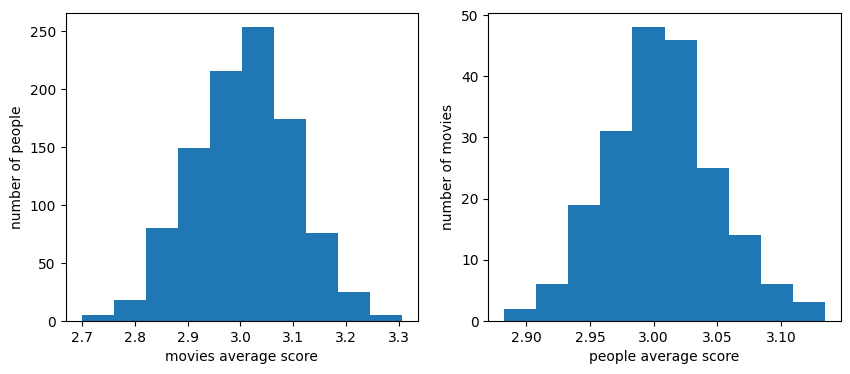

In [25]:
# converting dataframe values to numpy arrays for ease of use
data = df.to_numpy()

plt.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,2,1)
plt.hist(np.average(data, axis=1))
plt.xlabel('movies average score')
plt.ylabel('number of people')

plt.subplot(1,2,2)
plt.hist(np.average(data, axis=0))
plt.xlabel('people average score')
plt.ylabel('number of movies')
plt.show()

<h3> <font color="green"> Histograms Explaination </font> </h3>

### Left side histogram

In this histogram we can observe rating behavior of people in our dataset. Based on this histogram it can be stated that about 250 people have rated all mobies in our dataset with an average score of 3. This diagram show us how poeple rate all range of movies in our dataset. Across all types of movies most people have average score of 3 which means that they have rated movies fairly. They haven't rate bad movies with high score of good movies with very low scores.

### Right side histogram
In this histogram we can observe rating behavior of movies in our dataset. It can be seen that 50 movies out of the 200 movies have recieved an average score of 3 from people.
The distribution of our data is almost gaussian with average of 3.

### 3.2 Data Preprocessing (5 points)
Before applying PCA, we should preprocess the data.

1. Normalize the data so that each movie has a mean rating of 0 and a standard deviation of 1. This ensures that our PCA isn't affected by the scale of the ratings.
2. Split the dataset into a training set and a test set. Use 80% of the data for training and 20% for testing.

In [26]:
# spliting data to test and train
data_train, data_test = train_test_split (data, test_size=0.2)

# normalizing (set data mean to 0 and it's standard deviation to 1)
scaler = StandardScaler()
norm_data = scaler.fit_transform(data_train)


### 3.3 Principal Component Analysis (10 points)
Now we can apply PCA to the training set.

1. Implement PCA. You might want to use a library like scikit-learn, or you might choose to implement it from scratch.
**Note: Implementation from scratch is bonus.**
2. Choose the number of principal components to retain. Explain why you chose this number.

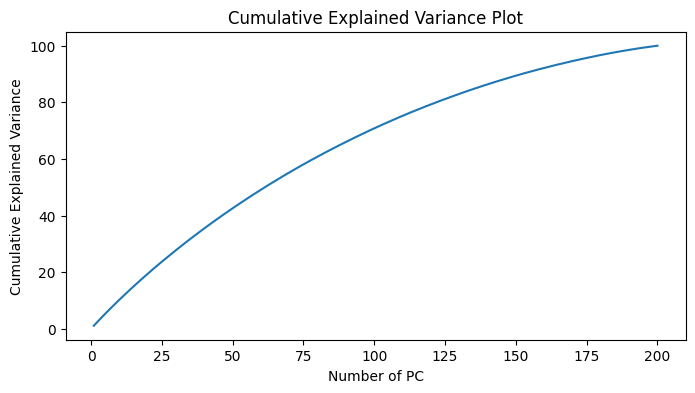

In [27]:
# Implementing PCA from scrath.
# Using the same code we developed in the previous question

cov_mat = np.cov(data_train.T)/len(data_train)

# Eigendecomposition of covariance matrix
eigvals, eigvecs = np.linalg.eig(cov_mat)

# sorting eigenvalues and eigenvectors in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Compute explained variance ---> eigenvalue/(sum of egn_values )
expl_var = eigvals / np.sum(eigvals) * 100

# Plot the cumulative explained variance
cum_expl_var = np.cumsum(expl_var)
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(range(1, len(eigvals) + 1), cum_expl_var)
plt.xlabel('Number of PC')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

<h3> <font color="green"> Explaination </font> </h3>

Based on the above cure, it can be seen that the cumulative explained variance grows approximately linear as we increase number of principle components. Unlike the previous question that almos 300 PCs of the total 784 PCs contains all the variances in the data, in this question our data gathered in a way that the variance of our data in direction of each component is almost the same. This means that for a good and accurate reconstruction we might need almost all of the PCs.

In the following sections we will choose different numbers of PCs and predict the test data. We will discuss it more in the next parts.

In [28]:
# Apply the PCA
P = [185, 190, 195, 200]
eigvals_p = []
eigvecs_p = []
for p in P:
  eigvals_p.append(eigvals[:p])
  eigvecs_p.append(eigvecs[:, :p])

reduced_data = []
for i in range(len(P)):
  reduced_data.append(data_train @ eigvecs[i])


### 3.4 Interpretation of Principal Components (10 points)
The principal components can be difficult to interpret. But since our dataset is about movie ratings, we might expect that they correspond to some kinds of `tastes` in movies.

For each of the first few principal components, find the 5 movies with the highest and lowest loadings.
`Loading` refers to the coefficients of the linear combination of the original variables (in your case, movie ratings) that make up a principal component. They reflect how much each original variable contributes to the principal component.
In terms of their `highest` and `lowest` loading:
1. The variables (or in the context, movies) with the highest loadings on a principal component are those that contribute the most (positively) to that component. In other words, these are the movies that a user rates similarly when considering this underlying factor. They might represent a specific taste in movies. For example, if the first principal component has high loadings for a lot of action movies, it might represent a taste for action films.
2. Conversely, the variables with the lowest loadings (or the most negative) on a principal component contribute negatively to that component. In the context of movie ratings, these might represent the movies that a user tends to rate lower when this underlying taste is considered.

In [29]:
p = 3
loadings = eigvecs[:,:p] * np.sqrt(eigvals[:p])

abs_loadings = np.abs(loadings)
sorted_loadings = np.zeros(loadings.shape)
movies = np.zeros(loadings.shape)
for i in range(loadings.shape[1]):
    idx = np.argsort(abs_loadings[:,i])[::-1]
    sorted_loadings[:,i] = abs_loadings[idx,i]
    movies[:,i] = idx

for j in range(loadings.shape[1]):
    print(f"\t\t ******* \t PC {j+1} \t\t *******")
    print(f'Top five movies with highest absolute loadings and their values for PC{j+1}:')
    for i in range(5):
        print(f'\t\tMovie {movies[i,j]: .0f}  \t\t {sorted_loadings[i,j]: .3f}')
    print(f'Top five movies with lowest absolute loadings and their values for PC{j+1} :')
    for i in range(5):
        print(f'\t\tMovie {movies[-1-i,j]: .0f}  \t\t {sorted_loadings[-1-i,j]: .3f}')
    print('============================================================================\n')


		 ******* 	 PC 1 		 *******
Top five movies with highest absolute loadings and their values for PC1:
		Movie  182  		  0.016
		Movie  161  		  0.013
		Movie  185  		  0.012
		Movie  84  		  0.012
		Movie  152  		  0.011
Top five movies with lowest absolute loadings and their values for PC1 :
		Movie  1  		  0.000
		Movie  94  		  0.000
		Movie  106  		  0.000
		Movie  156  		  0.000
		Movie  49  		  0.000

		 ******* 	 PC 2 		 *******
Top five movies with highest absolute loadings and their values for PC2:
		Movie  52  		  0.015
		Movie  31  		  0.014
		Movie  80  		  0.013
		Movie  65  		  0.012
		Movie  66  		  0.012
Top five movies with lowest absolute loadings and their values for PC2 :
		Movie  164  		  0.000
		Movie  190  		  0.000
		Movie  18  		  0.000
		Movie  139  		  0.000
		Movie  149  		  0.000

		 ******* 	 PC 3 		 *******
Top five movies with highest absolute loadings and their values for PC3:
		Movie  174  		  0.015
		Movie  149  		  0.013
		Movie  85  		  0.013
		Movi

### 3.5 Reconstruction of Ratings and Error Analysis (15 points)
Now we will use our PCA to make predictions.

1. **Project the test set onto the principal components, then reconstruct it.**
  After you've found the principal components (from your training set), you can use them to transform your test set. This involves representing each user in the test set as a combination of the principal components. Then, you `reconstruct` the test set. This means you convert your data back from the principal component space to the original space of movie ratings. This gives you a set of `predicted` ratings for each movie. These predicted ratings aren't exactly the original ratings. They're what the PCA model thinks the ratings should be, based on the patterns it learned from the training set.
2. **Measure the mean squared error (MSE) between the original ratings and the reconstructed ratings. Is the error high or low? Why?**
  To evaluate how good your PCA model is, you compare the predicted ratings to the actual ratings. You calculate the Mean Squared Error (MSE), which is a common way to measure the difference between predicted and actual values.
3. **Plot a scatterplot to show the original ratings (on the x-axis) and the predicted ratings (on the y-axis) for a few users and movies.**
 Finally, you visualize the results with a scatterplot. The x-coordinate is the original rating, and the y-coordinate is the predicted rating. If the PCA model is perfect, all points would lie along the line y = x.

In [30]:
predicted_data = []
MSE = []
test_avg = data_test - np.mean(data_test, axis=0)
for i in range(len(P)):
  red_vectors = test_avg @ eigvecs_p[i]
  reconst_data = red_vectors @ eigvecs_p[i].T + np.mean(data_test, axis=0)
  MSE.append(np.mean(np.abs(reconst_data - data_test) ** 2))
  predicted_data.append(reconst_data)

for i in range(len(P)):
  print(f"MSE error when using {P[i]} PCs \t\t {MSE[i]}")

MSE error when using 185 PCs 		 0.15620639464655758
MSE error when using 190 PCs 		 0.10911352160806284
MSE error when using 195 PCs 		 0.05305372810524151
MSE error when using 200 PCs 		 1.493917521739858e-26


<h3> <font color="green"> Explaination </font> </h3>

As we mentioned before, based on the cumulative explained variance curve we will need lots of principal component to accuratly represent and predict test data. Here it can be seen that when we use all of the PCs, the error will be zero while the MSE error will increase as we choose less PCs for our model.

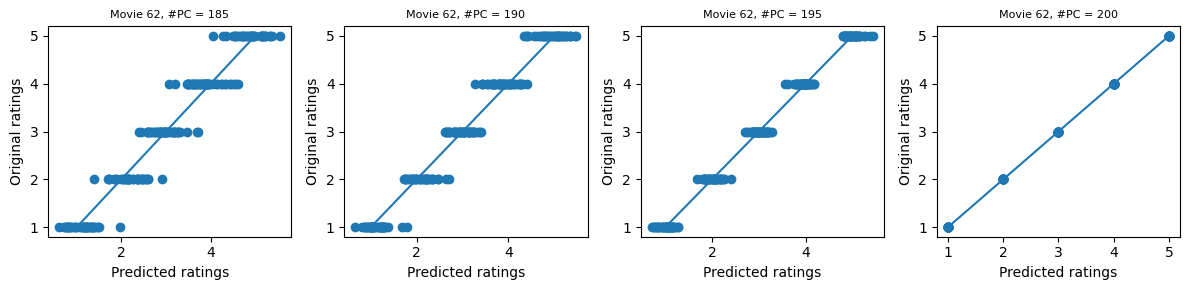

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=len(P), figsize=(12, 3))
idx = np.random.randint(1,data_test.shape[0])
for i in range(len(P)):
    axs[i].scatter(predicted_data[i][:,idx], data_test[:,idx])
    axs[i].plot(np.linspace(1,5,100), np.linspace(1,5,100))
    axs[i].set_xlabel('Predicted ratings')
    axs[i].set_ylabel('Original ratings')
    axs[i].set_title(f"Movie {idx}, #PC = {P[i]}", fontsize=8)
plt.tight_layout()


<h3> <font color="green"> Explaination </font> </h3>

It can be vividly seen that as we increase the number of PCs, the difference between the predicted values and the original valuese will decrease. This means that our model has become more accurate than before. When we use all of the PCs, the predicted values and original values are the same so dots will be placed on $y=x$ line.

Please submit your Python notebook with all code, outputs, and explanations clearly shown. We'll evaluate your problem set based on the correctness and clarity of your code, the correctness and depth of your explanations, and the creativity of your interpretations.